In [1]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Use path
dataset = pd.read_csv('/content/drive/MyDrive/heart_disease.csv')

In [4]:
dataset.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
dataset['HeartDisease'] = dataset['HeartDisease'].map({'Yes': 1, 'No': 0})

## 1. Heart disease against smoking habit

In [7]:
heart_disease_vs_smoking_rate = (
    dataset.groupby('Smoking')['HeartDisease']
    .aggregate('mean', 'sum')
    .reset_index(name='rate')
)
print(heart_disease_vs_smoking_rate)

  Smoking      rate
0      No  0.060327
1     Yes  0.121574


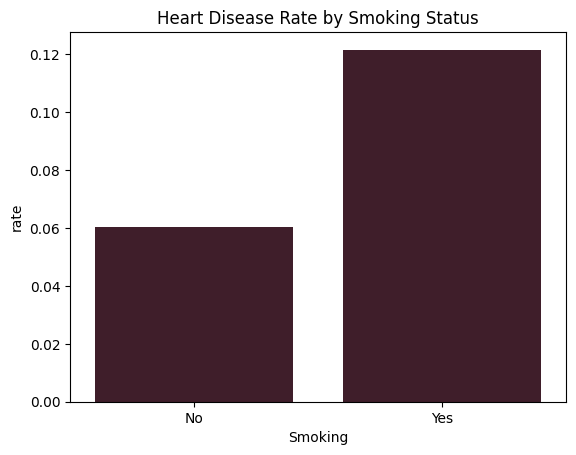

In [8]:
sns.barplot(
    data = heart_disease_vs_smoking_rate,
    x = 'Smoking',
    y = 'rate',
    color = '#451828'
)
plt.title("Heart Disease Rate by Smoking Status")
plt.show()

1. People who smoke have a 12.16% rate of heart disease.  
2. People who don’t smoke have a 6.03% rate.  
3. Smoking nearly doubles the risk of heart disease in this dataset.


In [9]:
heart_disease_vs_alcohol_drinking = (
    dataset.groupby('AlcoholDrinking')['HeartDisease']
    .aggregate('mean', 'sum')
    .reset_index(name='rate')
)
print(heart_disease_vs_alcohol_drinking)

  AlcoholDrinking      rate
0              No  0.088007
1             Yes  0.052361


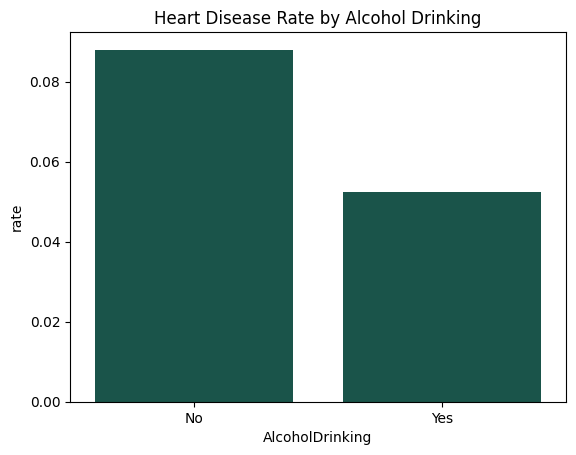

In [10]:
sns.barplot(
    data = heart_disease_vs_alcohol_drinking,
    x = 'AlcoholDrinking',
    y = 'rate',
    color = '#105e51'
)
plt.title("Heart Disease Rate by Alcohol Drinking")
plt.show()

1. People who do not drink alcohol have a 8.8% rate of heart disease.  
2. People who do drink alcohol have a 5.24% rate.  
3. Surprisingly, the dataset suggests that alcohol drinkers have a lower heart disease rate than non-drinkers.

In [14]:
heart_disease_vs_sleeping_pattern = (
    dataset.groupby('SleepTime')['HeartDisease']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

print(heart_disease_vs_sleeping_pattern)

    SleepTime  HeartDisease
0        19.0      0.333333
1        22.0      0.333333
2        20.0      0.250000
3        18.0      0.205882
4        24.0      0.200000
5        12.0      0.188748
6        13.0      0.185567
7        14.0      0.176955
8        11.0      0.175904
9         3.0      0.174284
10        2.0      0.162643
11        4.0      0.152168
12       10.0      0.149422
13       16.0      0.144068
14       15.0      0.126984
15        1.0      0.108893
16        5.0      0.105798
17        9.0      0.105608
18       17.0      0.095238
19        8.0      0.085616
20        6.0      0.081302
21        7.0      0.064643
22       21.0      0.000000
23       23.0      0.000000


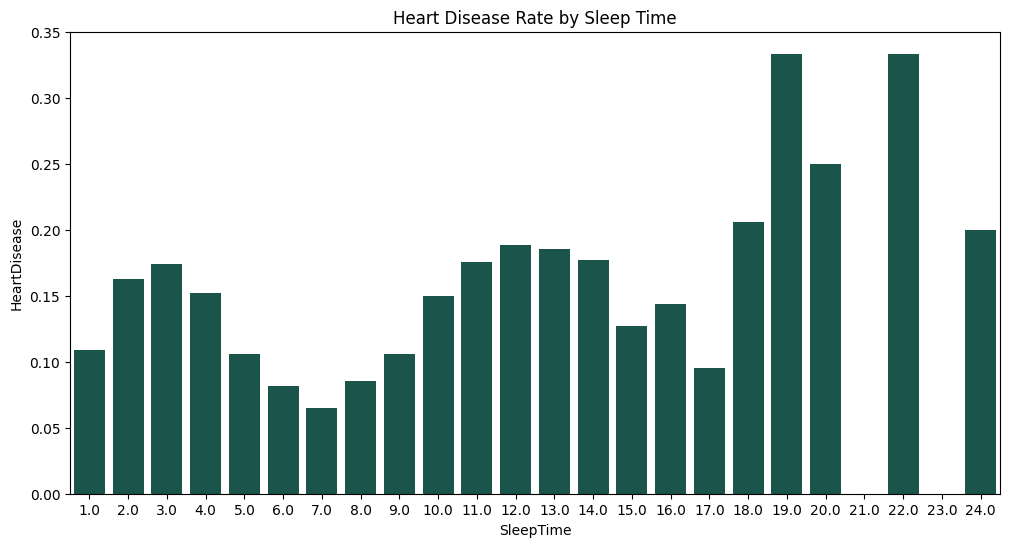

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=heart_disease_vs_sleeping_pattern,
    x='SleepTime',
    y='HeartDisease',  # the mean values column
    color='#105e51'
)
plt.title("Heart Disease Rate by Sleep Time")
plt.show()

1. Very low or very high SleepTime (like 1–4 hours or 18–24 hours) has higher
   heart disease rates.

2. Middle-range sleep (6–8 hours) shows lower heart disease rates.

3. Both insufficient and excessive sleep are linked with increased heart disease risk.

4. Most common healthy sleep range (6–8 hours) correlates with lower rates, consistent with medical studies.

In [16]:
heart_disease_vs_physical_health = (
    dataset.groupby('PhysicalHealth')['HeartDisease']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

print(heart_disease_vs_physical_health)

    PhysicalHealth  HeartDisease
0             29.0      0.289216
1             23.0      0.260870
2             19.0      0.257143
3             28.0      0.242152
4             30.0      0.236736
5             27.0      0.225806
6             24.0      0.223881
7             25.0      0.218401
8              9.0      0.205556
9             20.0      0.199316
10            18.0      0.197605
11            17.0      0.190909
12            15.0      0.185555
13            26.0      0.181818
14            12.0      0.171901
15            22.0      0.168539
16            21.0      0.158147
17            16.0      0.155556
18            10.0      0.153677
19             6.0      0.136220
20             8.0      0.129870
21             5.0      0.117686
22             4.0      0.110564
23            13.0      0.109890
24            14.0      0.107847
25            11.0      0.105882
26             7.0      0.100454
27             3.0      0.097830
28             2.0      0.078562
29        

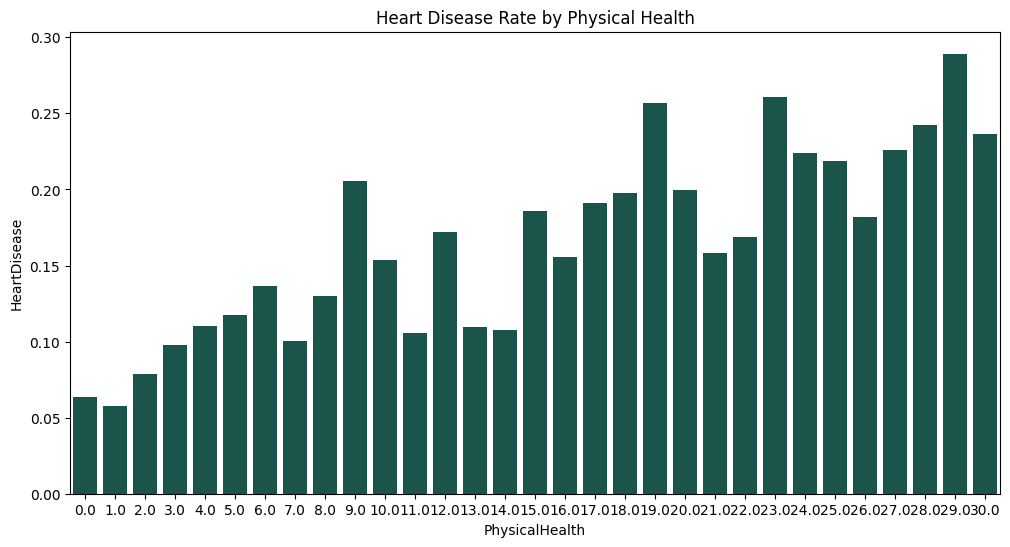

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=heart_disease_vs_physical_health,
    x='PhysicalHealth',
    y='HeartDisease',
    color='#105e51'
)
plt.title("Heart Disease Rate by Physical Health")
plt.show()

1. PhysicalHealth is likely number of days in the past month with poor physical health.

2. Higher values > more unhealthy days > higher heart disease rates.

3. Low values (0–5 days) have lower risk, while 20+ days show much higher risk .

In [19]:
# Group by multiple features
combined_features = ['Smoking', 'AlcoholDrinking', 'SleepTime', 'PhysicalHealth']
heart_disease_combined = (
    dataset.groupby(combined_features)['HeartDisease']
    .agg(['sum', 'mean'])
    .sort_values(by='sum', ascending=False)
    .reset_index()
)

# Show top 5 combinations
top5_combined = heart_disease_combined.head(5)
print(top5_combined)

  Smoking AlcoholDrinking  SleepTime  PhysicalHealth   sum      mean
0     Yes              No        8.0             0.0  2633  0.105034
1      No              No        8.0             0.0  2186  0.050447
2     Yes              No        7.0             0.0  1901  0.080890
3      No              No        7.0             0.0  1770  0.039186
4     Yes              No        6.0             0.0  1457  0.087755


In [24]:
top5_combined['combo_readable'] = (
    "Smoking: " + top5_combined['Smoking'].astype(str) + ", " +
    "Alcohol: " + top5_combined['AlcoholDrinking'].astype(str) + ", " +
    "Sleep: " + top5_combined['SleepTime'].astype(str) + " hrs, " +
    "PhysicalHealth: " + top5_combined['PhysicalHealth'].astype(str) + " days"
)

# Sort by 'sum' descending to get bars in order
top5_combined = top5_combined.sort_values(by='sum', ascending=False)

/tmp/ipython-input-2903146847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_combined['combo_readable'] = (


In [27]:
top5_combined

,Smoking,AlcoholDrinking,SleepTime,PhysicalHealth,sum,mean,combo,combo_readable
0,Yes,No,8.0,0.0,2633,0.105034,Yes | No | 8.0 | 0.0,"Smoking: Yes, Alcohol: No, Sleep: 8.0 hrs, Phy..."
1,No,No,8.0,0.0,2186,0.050447,No | No | 8.0 | 0.0,"Smoking: No, Alcohol: No, Sleep: 8.0 hrs, Phys..."
2,Yes,No,7.0,0.0,1901,0.080890,Yes | No | 7.0 | 0.0,"Smoking: Yes, Alcohol: No, Sleep: 7.0 hrs, Phy..."
3,No,No,7.0,0.0,1770,0.039186,No | No | 7.0 | 0.0,"Smoking: No, Alcohol: No, Sleep: 7.0 hrs, Phys..."
4,Yes,No,6.0,0.0,1457,0.087755,Yes | No | 6.0 | 0.0,"Smoking: Yes, Alcohol: No, Sleep: 6.0 hrs, Phy..."


/tmp/ipython-input-914638001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


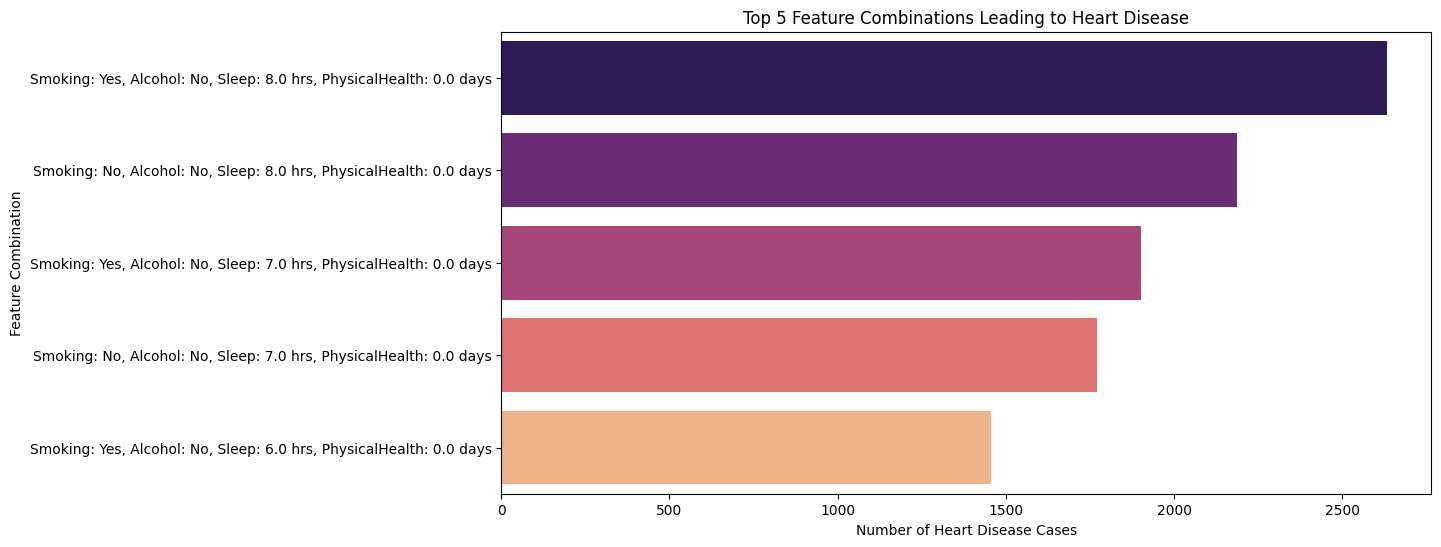

In [25]:
# Plot horizontal bar chart
plt.figure(figsize=(12,6))
sns.barplot(
    data=top5_combined,
    x='sum',
    y='combo_readable',  # readable labels
    palette='magma'
)
plt.xlabel("Number of Heart Disease Cases")
plt.ylabel("Feature Combination")
plt.title("Top 5 Feature Combinations Leading to Heart Disease")
plt.show()

1. The highest count and risk combination is smokers who do not drink, sleep 8 hours, and have 0 poor health days: 2,633 people.  
2. Second is non-smokers, non-drinkers, sleep 8 hours, 0 poor health days: 2,186 people.  
3. Third is smokers, non-drinkers, sleep 7 hours, 0 poor health days, 1,901 people.
4. Smoking significantly increases risk across different sleep durations.  
5. Alcohol drinking seems less prevalent in the high-risk groups here.  
6. Sleep time impacts risk but not as strongly as smoking.  
7. People with 0 poor physical health days still show significant risk when smoking, meaning smoking alone is a major risk factor.